## Applying sliding window on large tif

In [33]:
import glob
import matplotlib.pyplot as plt
import numpy as np

import rasterio

In [34]:
## define a sliding window function

def sliding_window(img, patch_size=[patch_size,patch_size],
                   istep=int(patch_size/2), jstep=int(patch_size/2), scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch

In [35]:
# find files 

inference_file_path = '../../data/rasters_waterbodies_osm/cloud_images/Balikpapan_039*.tif'

inference_file_list = (glob.glob(inference_file_path))

inference_file_list[0:5]

['../../data/rasters_waterbodies_osm/cloud_images/Balikpapan_039_pansharpen_True_2018-12-02_02:49_1030010089C5D200.tif']

In [36]:
# get image 

dataset = rasterio.open(inference_file_list[0])

meta_data = dataset.profile

out_img = dataset.read()

In [37]:
patch_size = 256

In [38]:
## Generate features and indices 

# reformat data for plotting / inference
inference_img = np.rot90(out_img[[3,2,1],:,:].T)

In [39]:
inference_img.shape

(4637, 4945, 3)

In [46]:
# apply sliding window
windows = [t[1] for t in sliding_window(inference_img,patch_size=[patch_size,patch_size])]
indices = [t[0] for t in sliding_window(inference_img,patch_size=[patch_size,patch_size])]

In [47]:
# stack data to match data structure for inference
indices = np.array(indices)
a = np.vstack(windows)

# perform inference on windows
# labels = model.predict(a)

# I now use hand made labels
labels = np.zeros(indices.shape[0])
labels[1000:-1] = 1 # the last part of the image is highlighted



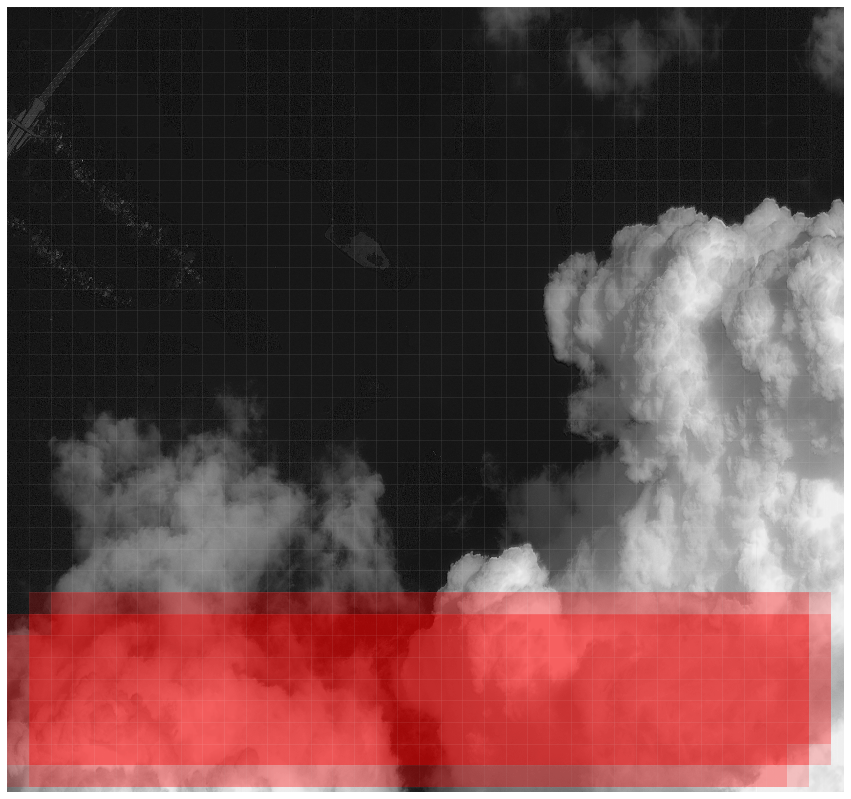

In [48]:
# 
Ni, Nj = [patch_size,patch_size]

#plot the predictions:
fig, ax = plt.subplots(figsize = (15,15))
 
# plot image
ax.imshow(out_img[0,:,:], cmap='gray')
ax.axis('off')

# highlight high probabilities 
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='none',
                               alpha=0.2, lw=2, facecolor='red'))

# add squares
for i, j in indices:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='white',
                               alpha=0.02, lw=1, facecolor='none'))